### Universidad Autónoma de Aguascalientes

### Centro de Ciencias Básicas

### Departamento de Ciencias de la Computación

### Optativa Profesionalizante II: Machine Learning y Deep Learning

### 10° "A"

### Actividad 1.01: Algoritmo del perceptrón para el conjunto de datos: Flor de Iris

### Docente: Dr. Francisco Javier Luna Rosas

### Alumno: Joel Alejandro Espinoza Sánchez (211800)

### Fecha de Entrega: Aguascalientes, Ags., 19 de febrero del 2023.

---

## Actividad 1.01: Algoritmo del perceptrón para el conjunto de datos: Flor de Iris

### La Regla de Aprendizaje del Perceptrón

La idea general que hay detrás de la neurona de MCP (McCulloch Pitts) y del modelo del perceptrón umbralizado de Rosenblatt es utilizar un enfoque reduccionista para imitar cómo trabaja una simple neurona en el cerebro: si se excita o si no. Así, la regla del perceptrón inicial de Rosenblatt es bastante sencilla y se puede resumir en los siguientes pasos:

1. Iniciar los pesos a números aleatorios

2. Para cada muestra de entrenamiento $x(i)$:

   a. Calcular el valor de salida "$y$"
   
   b. Actualizar los pesos

El alumno deberá elaborar un documento (```*.pdf```) y documento autoreproducible (```*.html```) donde implemente el modelo del perceptrón en el conjunto de datos Iris considerando solo dos clases de flor (Setosa y Versicolor) y solo tendrá que considerar las características de longitud del sépalo y la longitud del pétalo.

El alumno deberá subir a la plataforma el archivo (```*.pdf``` y ```*.html```) que deberá contener:

- Portada

- Evidencias de la actividad

- Conclusiones

- Referencias (formato APA)

- Letra Arial, tamaño 12 e interlineado 1.5

---

La realización personal de esta actividad con importar las librerías necesarias para la realización de esta actividad:

In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt

Lo siguiente será importar al código el dataset con el que se trabajará siendo éste el de Flor de Iris:

In [2]:
df = pd.read_csv('iris.csv', sep = ';')
df

,s.largo,s.ancho,p.largo,p.ancho,tipo
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


La idea detrás de lo que queremos hacer es, con base en las cuatro variables que poseemos, determinar de qué tipo de flor se trata. Esto se hará dándole un mayor o menor peso a cada variable usando la siguiente suma ponderada:

$$ (w_1 \cdot x_1) + (w_2 \cdot x_2) + (w_3 \cdot x_3) + (w_4 \cdot x_4) > \theta $$

Donde:

- $x_1$ son valores pertenecientes a la columna ```s.largo```
- $x_2$ son valores pertenecientes a la columna ```s.ancho```
- $x_3$ son valores pertenecientes a la columna ```p.largo```
- $x_4$ son valores pertenecientes a la columna ```p.ancho```
- $w_1$ es el peso por el que se multiplicará $x_1$
- $w_2$ es el peso por el que se multiplicará $x_2$
- $w_3$ es el peso por el que se multiplicará $x_3$
- $w_4$ es el peso por el que se multiplicará $x_4$
- $\theta$ es el sesgo o bias que determinará la separación lineal del problema

Así que, primeramente inicializaremos los pesos aleatoriamente:

In [3]:
w1 = random.uniform(-10, 10)
w2 = random.uniform(-10, 10)
w3 = random.uniform(-10, 10)
w4 = random.uniform(-10, 10)
theta = random.uniform(-10, 10)
print("w1 = " + str(w1))
print("w2 = " + str(w2))
print("w3 = " + str(w3))
print("w4 = " + str(w4))
print("theta = " + str(theta))

w1 = -8.00169654598273
w2 = 8.087111825763976
w3 = -4.538451944881263
w4 = 8.329577390102799
theta = 3.3999190341375574


Anterior a esto, para trabajar con mayor comodidad convertiremos los resultados deseados en un valor numérico. Además hay que eliminar las plantas de clasificación ```virginica```. Personalmente se eligió cambiar en la columna ```tipo``` los valores ```setosa``` por ```0``` y ```versicolor``` por ```1```:

In [4]:
df = df.drop(df[df['tipo'] == 'virginica'].index)
df["tipo"] = df["tipo"].replace({"setosa": 0, "versicolor": 1})
df

,s.largo,s.ancho,p.largo,p.ancho,tipo
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


Con estos valores comienza el procedimiento que consistirá en entrenar a la red neuronal. Según sus aciertos o errores estos valores irán modificándose según las definiciones del algoritmo. En el caso personal se decidió establecer una variable ```i``` sobre cuántas iteraciones se desearían realizar la cual marcaría el final del entrenamiento del algoritmo. Así también se determinó como ```learnRate``` la tasa de aprendizaje que el algoritmo tomará para aprender en cada iteración.

In [5]:
# Variables para graficar más al rato y ver los resultados más visualmente :)
erroresList = []
w1List = [w1]
w2List = [w2]
w3List = [w3]
w4List = [w4]
d1List = []
d2List = []
d3List = []
d4List = []

learnRate = 0.9
for i in range(10):
    errores = 0
    for j in range(len(df)):
        # Suma ponderada
        f = (w1 * df.loc[j, 's.largo']) + (w2 * df.loc[j, 's.ancho']) + (w3 * df.loc[j, 'p.largo']) + (w4 * df.loc[j, 'p.ancho'])
        
        # Comparamos la superación del umbral
        if(f > theta):
            f = 1
        else:
            f = 0
        
        # Se contabilizan los errores
        if(f != int(df.loc[j, 'tipo'])):
            errores = errores + 1
            
            # Cálculo de deltas
            d1 = learnRate * (int(df.loc[j, 'tipo']) - f) * df.loc[j, 's.largo']
            d2 = learnRate * (int(df.loc[j, 'tipo']) - f) * df.loc[j, 's.ancho']
            d3 = learnRate * (int(df.loc[j, 'tipo']) - f) * df.loc[j, 'p.largo']
            d4 = learnRate * (int(df.loc[j, 'tipo']) - f) * df.loc[j, 'p.ancho']

            # Actualización de pesos
            w1 = w1 + d1
            w2 = w2 + d2
            w3 = w3 + d3
            w4 = w4 + d4
            
    d1List.append(d1)
    d2List.append(d2)
    d3List.append(d3)
    d4List.append(d4)
    w1List.append(w1)
    w2List.append(w2)
    w3List.append(w3)
    w4List.append(w4)
    erroresList.append(errores)
print('Errores finales de la red: ' + str(errores))

Errores finales de la red: 0


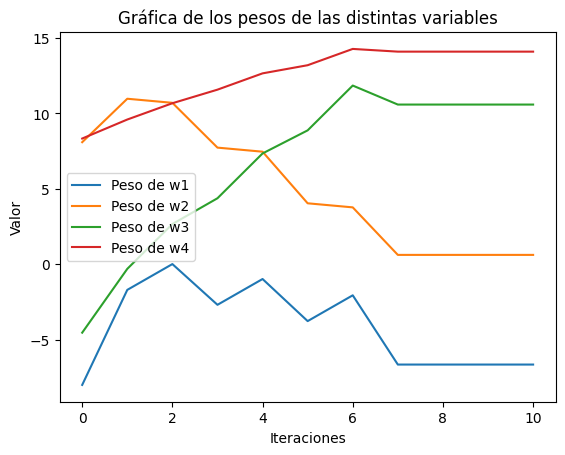

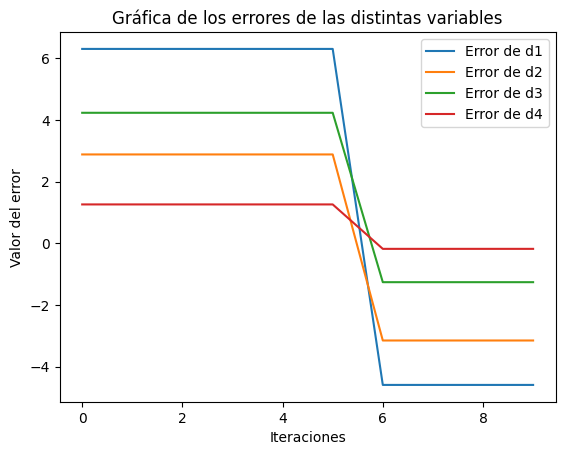

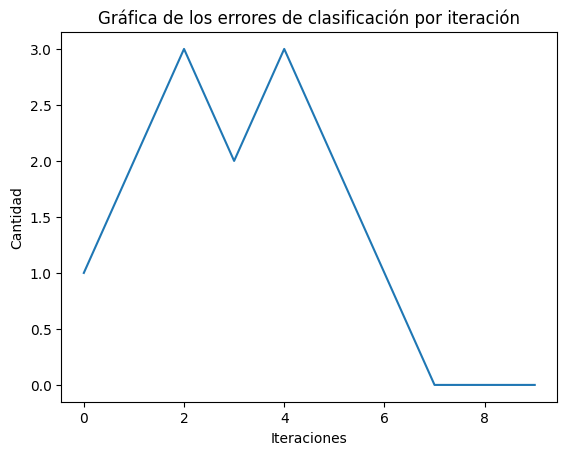

In [6]:
plt.plot(w1List, label = 'Peso de w1')
plt.plot(w2List, label = 'Peso de w2')
plt.plot(w3List, label = 'Peso de w3')
plt.plot(w4List, label = 'Peso de w4')
plt.xlabel('Iteraciones')
plt.ylabel('Valor')
plt.legend()
plt.title('Gráfica de los pesos de las distintas variables')
plt.show()

plt.plot(d1List, label = 'Error de d1')
plt.plot(d2List, label = 'Error de d2')
plt.plot(d3List, label = 'Error de d3')
plt.plot(d4List, label = 'Error de d4')
plt.xlabel('Iteraciones')
plt.ylabel('Valor del error')
plt.legend()
plt.title('Gráfica de los errores de las distintas variables')
plt.show()

plt.plot(erroresList)
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad')
plt.title('Gráfica de los errores de clasificación por iteración')
plt.show()